In [1]:
#load pandas and numpy modules
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
#read raw data
df = pd.read_csv('merged_data.csv')

if df.isnull().values.any():
    print ('missing values!')
    #raise ValueError
else:
    print('pass')

# removed_mol = ["ASD007", "ASD012", "ASD019", "ASD021", "D372-0163"]
# df = df[~df['MolID'].isin(removed_mol)]

df.head()

missing values!


,mol,Compound Number,mseq,Accum,Accum_SE,Accum_class,Excluded,ASA,ASA+,ASA-,...,vsurf_Wp2,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,weinerPath,weinerPol,zagreb
0,S(=O)(=O)(OC1C2OCC([N+])C2OC1)c1ccc(-c2ccccc2)cc1,4-1,1,1965.0,108.0,High,F,589.37537,375.03711,209.781050,...,491.18533,131.98276,37.599136,12.189655,0.918103,0.000000,0.0,1607,39,138
1,O(C)c1c(O)c2c(cc1)CC1[N+](C)CCC32C1CC(O)C([N+])C3,4-2,2,1913.0,156.0,High,F,514.13593,450.86008,63.275837,...,493.00000,180.00000,51.000000,15.375000,2.375000,0.125000,0.0,976,50,134
2,OC12C(=C)CC3(C(CC[N+])c4c(C)cccc4C3CC1)C2,4-3,3,1887.0,179.0,High,F,494.43210,349.70044,144.731660,...,431.03571,140.42857,39.464287,12.125000,1.375000,0.053571,0.0,753,44,126
3,O=C1C2(C)CC3(C(C[N+])c4c(C)cccc4C3CC2)C1,4-3a,64,1696.0,203.0,High,F,471.00363,323.49649,147.507140,...,362.12500,112.43750,32.125000,9.750000,0.812500,0.000000,0.0,650,43,122
4,OC12C(C)CC3(C(C[N+])c4c(C)cccc4C3CC1)C2,4-4,4,1650.0,69.0,High,F,479.01715,346.60675,132.410400,...,404.91666,133.16667,37.250000,10.958333,1.250000,0.041667,0.0,650,43,122


In [2]:
Y = df.iloc[:,5]
Y = Y.dropna() # drop row if NaN in Y
b_class = {'Low': 0, 'High': 1}
Yb = Y.map(b_class)
#Yb = (Y > np.median(Y)).astype(int) # binary classification split by median
Yb#.sum()

0     1
1     1
2     1
3     1
4     1
     ..
63    0
64    0
65    0
66    0
67    0
Name: Accum_class, Length: 68, dtype: int64

In [3]:
X_raw = df.iloc[:,7:]
#X_raw = X_raw.drop(index=NANrow)
X_raw.head()

,ASA,ASA+,ASA-,ASA_H,ASA_P,BCUT_PEOE_0,BCUT_PEOE_1,BCUT_PEOE_2,BCUT_PEOE_3,BCUT_SLOGP_0,...,vsurf_Wp2,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,weinerPath,weinerPol,zagreb
0,589.37537,375.03711,209.781050,444.04636,145.32903,-2.525216,-0.572012,0.639683,2.857105,-3.317452,...,491.18533,131.98276,37.599136,12.189655,0.918103,0.000000,0.0,1607,39,138
1,514.13593,450.86008,63.275837,371.82449,142.31142,-2.933136,-0.446061,0.582079,2.956264,-3.514344,...,493.00000,180.00000,51.000000,15.375000,2.375000,0.125000,0.0,976,50,134
2,494.43210,349.70044,144.731660,367.01440,127.41769,-2.786666,-0.401922,0.504723,2.929054,-3.286977,...,431.03571,140.42857,39.464287,12.125000,1.375000,0.053571,0.0,753,44,126
3,471.00363,323.49649,147.507140,364.81686,106.18677,-2.798107,-0.311067,0.448598,2.949188,-3.289287,...,362.12500,112.43750,32.125000,9.750000,0.812500,0.000000,0.0,650,43,122
4,479.01715,346.60675,132.410400,367.38467,111.63245,-2.785383,-0.409369,0.503576,2.968379,-3.289323,...,404.91666,133.16667,37.250000,10.958333,1.250000,0.041667,0.0,650,43,122


In [4]:
# scale data using robust scaler
from sklearn.preprocessing import RobustScaler, StandardScaler

#scaler = StandardScaler()
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_raw), columns=X_raw.columns)

X_scaled.head()

,ASA,ASA+,ASA-,ASA_H,ASA_P,BCUT_PEOE_0,BCUT_PEOE_1,BCUT_PEOE_2,BCUT_PEOE_3,BCUT_SLOGP_0,...,vsurf_Wp2,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,weinerPath,weinerPol,zagreb
0,0.790739,0.174851,1.392767,1.098846,0.118088,0.774540,-0.548485,0.676175,-0.026038,-0.368674,...,1.090637,0.101928,0.030120,-0.008310,-0.457853,0.000000,0.0,1.012771,0.021277,0.38
1,0.101503,0.822732,-1.453412,0.083103,0.064896,-0.570121,-0.008753,0.385990,0.415770,-3.755058,...,1.113449,1.435427,1.322267,0.701028,0.542637,3.720280,0.0,0.206897,0.489362,0.30
2,-0.078995,-0.041643,0.129042,0.015453,-0.197641,-0.087301,0.180394,-0.003697,0.294532,0.155464,...,0.334497,0.336479,0.209963,-0.022708,-0.144090,1.594406,0.0,-0.077905,0.234043,0.14
3,-0.293613,-0.265547,0.182962,-0.015453,-0.571886,-0.125014,0.569728,-0.286431,0.384240,0.115737,...,-0.531779,-0.440869,-0.497711,-0.551593,-0.530374,0.000000,0.0,-0.209451,0.191489,0.06
4,-0.220205,-0.068077,-0.110325,0.020661,-0.475893,-0.083072,0.148481,-0.009476,0.469748,0.115109,...,0.006155,0.134806,-0.003545,-0.282511,-0.229931,1.240093,0.0,-0.209451,0.191489,0.06


In [10]:
print('# of features before drop:', X_scaled.shape[1])
#create correlation matrix
corr_matrix_before = X_scaled.corr().abs() # absolute value of corralation matrix

#set a cutoff threshold (usually 0.9 or 0.85)
cut_th = 0.9

#select upper triangle of correlation matrix
upper = corr_matrix_before.where(np.triu(np.ones(corr_matrix_before.shape), k=1).astype(bool)) # first build a boolean upper triangle, then use where() to extract upper triangle from correlation matrix

#drop highly correlated features based on set threshold
to_drop = [column for column in upper.columns if any(upper[column] > cut_th)] # remove columns that has correlation with any value larger than threshold
'''two problems: 1. if multiple features are correlated, only the first one is kept; 2. may remove too many features, since the removal of "bridge" feature makes the rest features non-correlated'''
#to_drop.extend(["Ipc", "EState_VSA5"]) # brings to much variation
X_cor = X_scaled.drop(columns = to_drop)

print('# of features after drop:', X_cor.shape[1])
print('# of features dropped:', len(to_drop))
print("Dropped features:")
print(to_drop)

# of features before drop: 297
# of features after drop: 149
# of features dropped: 148
Dropped features:
['BCUT_SLOGP_1', 'BCUT_SLOGP_2', 'BCUT_SMR_0', 'BCUT_SMR_1', 'BCUT_SMR_2', 'BCUT_SMR_3', 'CASA+', 'DCASA', 'FASA-', 'FASA_P', 'FCASA+', 'FCASA-', 'GCUT_PEOE_3', 'GCUT_SLOGP_3', 'GCUT_SMR_0', 'GCUT_SMR_1', 'GCUT_SMR_2', 'GCUT_SMR_3', 'Kier1', 'Kier3', 'KierA1', 'KierA2', 'KierA3', 'KierFlex', 'MolWt', 'PEOE_RPC+', 'PEOE_RPC-', 'PEOE_VSA_FPOL', 'PEOE_VSA_FPOS', 'PEOE_VSA_HYD', 'PEOE_VSA_PNEG', 'RB', 'SMR', 'SlogP_VSA1', 'SlogP_VSA3', 'TPSA', 'VAdjEq', 'VAdjMa', 'VDistMa', 'VSA', 'a_IC', 'a_base', 'a_count', 'a_donacc', 'a_heavy', 'a_nC', 'a_nF', 'a_nH', 'apol', 'b_1rotN', 'b_1rotR', 'b_ar', 'b_count', 'b_heavy', 'b_rotN', 'b_rotR', 'b_single', 'bpol', 'chi0', 'chi0_C', 'chi0v', 'chi0v_C', 'chi1', 'chi1_C', 'chi1v', 'chi1v_C', 'dens', 'density', 'diameter', 'h_ema', 'h_logS', 'h_mr', 'h_pavgQ', 'lip_acc', 'logP(o/w)', 'mr', 'opr_nring', 'opr_nrot', 'petitjeanSC', 'pmi', 'pmi1', 'pmi1_

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def data_split(X, Y, test_size):
    if not (type(X) is np.ndarray):
        X = X.to_numpy()
    if not (type(Y) is np.ndarray):
        Y = Y.to_numpy()
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = test_size)

    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = data_split(X_cor, Yb, 0.2)
#X_train, X_test, Y_train, Y_test = data_split(X_given, Yb, 0.2)

In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import (recall_score,accuracy_score,confusion_matrix, f1_score, precision_score, 
                             auc,roc_auc_score,roc_curve, precision_recall_curve,classification_report)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


#K-fold validation function will take six arguments: 
#1. model, 2. train set, 3.test set, 4.# of fold, 5.shuffle boolean, 6.random_state.
def kf_cv(clf, X, y, folds = 10, shuf = True, random_state=0):
    cv = KFold(n_splits=folds, random_state=42, shuffle=shuf)
    f1,prec,recall,acc,ROC_AUC,conf = ([],[],[],[],[],[])
    metric_cols=['F1','precision','recall','accuracy','ROC_AUC','confusion_matrix']
    print('Classifier ##{0}## will be used with {1} folds, and shuffle mode is {2}'.format(clf.__class__.__name__,
                                                                                       folds,
                                                                                       'on' if shuf else 'off')
         )
    i = 0
    for train_index, test_index in cv.split(X):
        #turn on the below code will print train_index/test_index and may help understand the details and debug.
        #print("Train Index: ", type(train_index), "\n")
        #print("Test Index: ", test_index)
        
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        #if sampling method is used, use this to avoid warnings: clf.fit(X_train.values, y_train.values.ravel())
        clf.fit(X_train, y_train.ravel())
        
        pred_test = clf.predict(X_test)
        pred_test_probs = clf.predict_proba(X_test)
        #print(pred_test_probs)
        fpr, tpr, _ = roc_curve(y_test,pred_test_probs[:,1]) # use pred_test_probs instead of pred_test
        
        f1.append(f1_score(y_test,pred_test))
        prec.append(precision_score(y_test,pred_test))
        recall.append(recall_score(y_test,pred_test))
        acc.append(accuracy_score(y_test,pred_test))
        ROC_AUC.append(roc_auc_score(y_test, pred_test_probs[:,1]))       
        conf.append(confusion_matrix(y_test,pred_test))

        plt.plot(fpr, tpr, label=str(i))
        i += 1 # plot ROC curve
    
    plt.axline([0, 0], [1, 1], linewidth=1, color='k', linestyle='--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend()
    plt.show()
    #return a dataframe consisting five metrics and confusion matrix.
    return pd.DataFrame(zip(f1,prec,recall,acc,ROC_AUC,conf), columns = metric_cols)

In [14]:
#dataset from other paper
# RandomForest
RF_tuned_params = {'max_depth': None,
                   'max_features': 20,
                   'min_samples_leaf': 8,
                   'n_estimators': 160,
                  }

#Best score: 0.8366666666666667
# LogisticRegression
LR_tuned_params = {'C': 1, 
                   'penalty': 'l2', 
                   'solver': 'sag'
                  }
#Best score: 0.8033333333333333


Classifier ##RandomForestClassifier## will be used with 5 folds, and shuffle mode is on


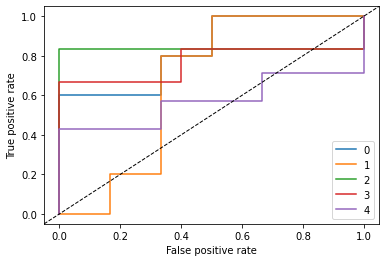



detail results in dictionary "cv_score_dict" using model_name as key
Performance summary in df "cv_score_mean" and "cv_score_sem"


,F1,precision,recall,accuracy
RF,0.76,0.73,0.8,0.72


In [15]:

#make sure datasets are converted from pandas DataFrame into numpy ndarray avoid errors in machine learning.
  
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=0) #same random_state as previous GS

#setting up models using tuned hyperparameters from Grid Search.
#GBDT = GradientBoostingClassifier(random_state=42).set_params(**GBDT_tuned_params)
RF = RandomForestClassifier(random_state=0).set_params(**RF_tuned_params)
LR = LogisticRegression(random_state=0).set_params(**LR_tuned_params)
#SVM = SVC(random_state=42).set_params(**SVM_tuned_params)

#create dictionary to store k-fold CV results
cv_score_dict = {}
#create a dataframe to store the mean and standard error of the mean (SEM) from k-fold CV
cv_score_mean = pd.DataFrame()
cv_score_sem = pd.DataFrame()

#run k-fold CV
for clf, model_name in zip([RF], ['RF']):#'RF','GBDT','LR','SVM'
    #clf = eval(model_name)
    cv_score_dict[model_name] = kf_cv(clf,X_train,Y_train,5,True)
    cv_score_mean[model_name] = cv_score_dict[model_name].mean()[:-1]
    cv_score_sem[model_name] = cv_score_dict[model_name].sem()
    
cv_score_mean = cv_score_mean.transpose().astype(float).round(2)
cv_score_sem = cv_score_sem.transpose().round(2)

print('\n\ndetail results in dictionary "cv_score_dict" using model_name as key')
print('Performance summary in df "cv_score_mean" and "cv_score_sem"')

# check mean performance of each model.
cv_score_mean

In [16]:
cv_score_dict['RF']

,F1,precision,recall,accuracy,ROC_AUC,confusion_matrix
0,0.727273,0.666667,0.800000,0.727273,0.833333,"[[4, 2], [1, 4]]"
1,0.727273,0.666667,0.800000,0.727273,0.666667,"[[4, 2], [1, 4]]"
2,0.909091,1.000000,0.833333,0.909091,0.833333,"[[5, 0], [1, 5]]"
3,0.714286,0.625000,0.833333,0.636364,0.766667,"[[2, 3], [1, 5]]"
4,0.714286,0.714286,0.714286,0.600000,0.571429,"[[1, 2], [2, 5]]"


In [17]:
#create a dataframe to store test set performance
test_set_result = pd.DataFrame()
f1,prec,recall,acc,ROC_AUC,conf = ([],[],[],[],[],[])

#evaluate the performance of the different classifiers
for model_name in ['RF']:#'RF','GBDT','LR','SVM'
    clf = eval(model_name)

    clf.fit(X_train, Y_train)

    pred_test = clf.predict(X_test)
    pred_test_probs = clf.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(Y_test,pred_test)

    f1.append(f1_score(Y_test,pred_test))
    prec.append(precision_score(Y_test,pred_test))
    recall.append(recall_score(Y_test,pred_test))
    acc.append(accuracy_score(Y_test,pred_test))
    ROC_AUC.append(roc_auc_score(Y_test, pred_test_probs[:,1]))       
    conf.append(confusion_matrix(Y_test,pred_test))
    
test_set_scores = zip(f1,prec,recall,acc,ROC_AUC,conf)   

test_set_result = pd.DataFrame(test_set_scores, 
                               columns=['F1','precision','recall',
                                        'accuracy','ROC_AUC','confusion_matrix'], 
                               index = ['RF'])#'RF','GBDT','LR','SVM'
test_set_result.round(2)

,F1,precision,recall,accuracy,ROC_AUC,confusion_matrix
RF,0.63,0.56,0.71,0.57,0.78,"[[3, 4], [2, 5]]"
